In [ ]:
!pip install librosa


In [ ]:
import librosa


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


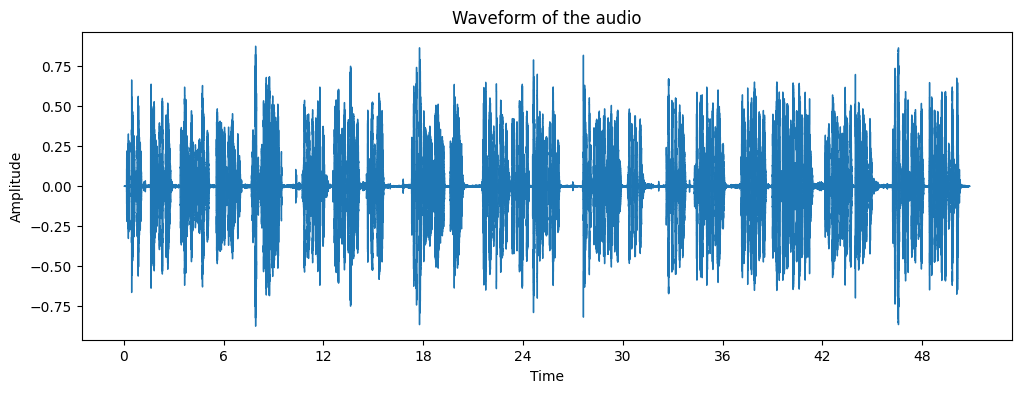

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
# Path to the audio file
audio_path = '/content/drive/MyDrive/CIHR/French-data/haiti1.mp3'
# Load the audio file using librosa
y, sr = librosa.load(audio_path)
# Display the waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Waveform of the audio')
plt.show()


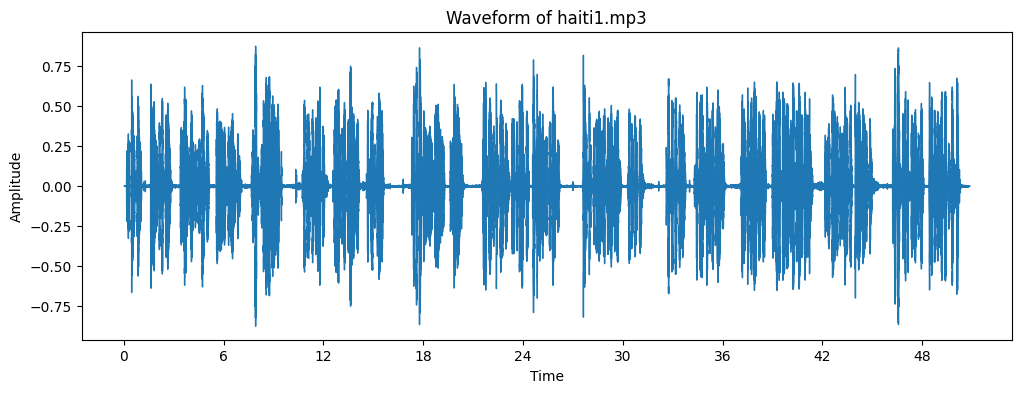

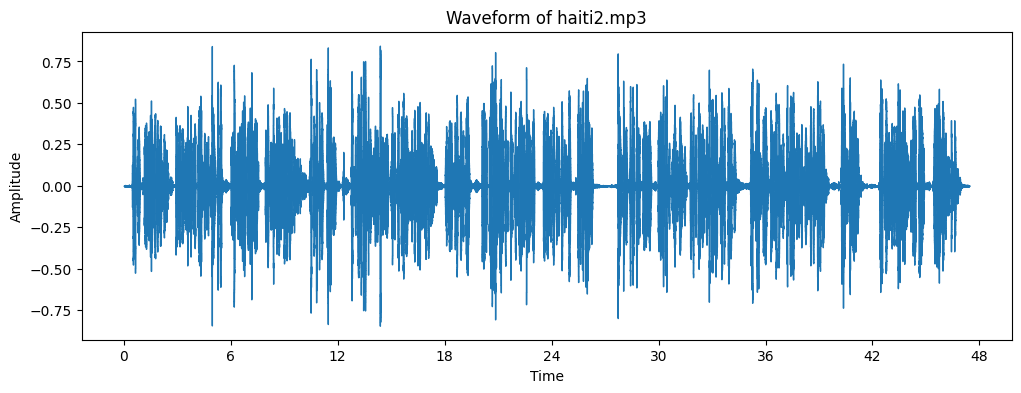

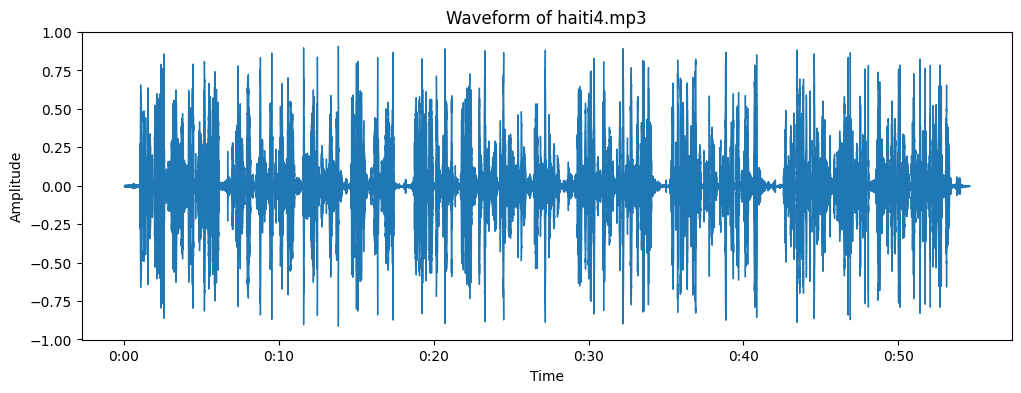

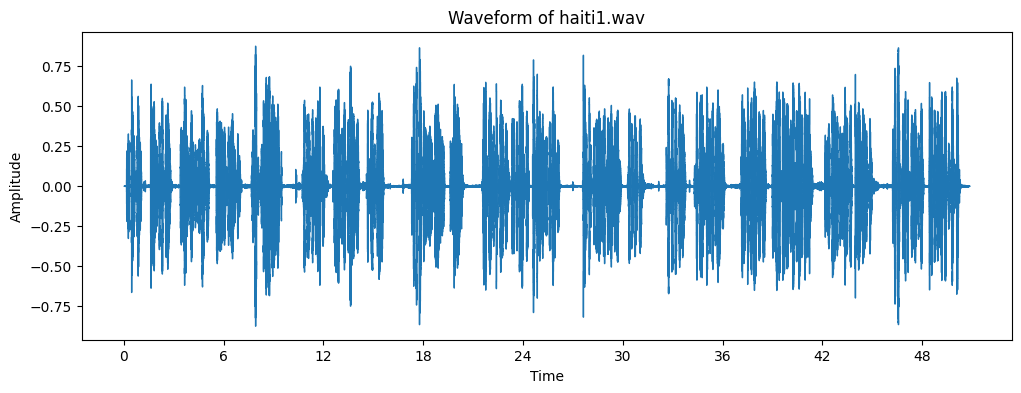

In [ ]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Directory containing the audio files
directory = '/content/drive/MyDrive/CIHR/French-data/'

# Get a list of all files in the directory
file_list = os.listdir(directory)

# Filter the list to include only audio files (you can adjust the file extensions as needed)
audio_files = [file for file in file_list if file.endswith('.mp3') or file.endswith('.wav')]

# Loop through each audio file
for audio_file in audio_files:
    audio_path = os.path.join(directory, audio_file)

    # Load the audio file using librosa
    y, sr = librosa.load(audio_path)

    # Display the waveform
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title(f'Waveform of {audio_file}')
    plt.show()


#Calculating Speech Duration

In [ ]:
import librosa

def calculate_speech_duration(audio_file_path):
    # Load the audio file and extract the audio signal and sampling rate
    audio_signal, sampling_rate = librosa.load(audio_file_path)

    # Calculate short-term energy of the audio signal
    frame_length = int(0.050 * sampling_rate)  # 50ms frames
    hop_length = int(0.025 * sampling_rate)    # 25ms hop size
    energy = librosa.feature.rms(y=audio_signal, frame_length=frame_length, hop_length=hop_length)

    # Calculate the speech duration based on energy thresholding
    energy_threshold = 0.01  # Adjust this value based on your audio characteristics
    is_speech = [e > energy_threshold for e in energy[0]]

    # Calculate speech duration (in seconds)
    speech_duration = sum(hop_length for i in range(1, len(is_speech)) if is_speech[i] and not is_speech[i - 1]) / sampling_rate

    return speech_duration

# Replace "path/to/your/audio/file.wav" with the actual path to your audio file in your Google Drive or elsewhere.

speech_duration = calculate_speech_duration(audio_path)
print(f"Speech duration: {speech_duration:.2f} seconds")


Speech duration: 1.37 seconds


In [ ]:
!pip install pydub

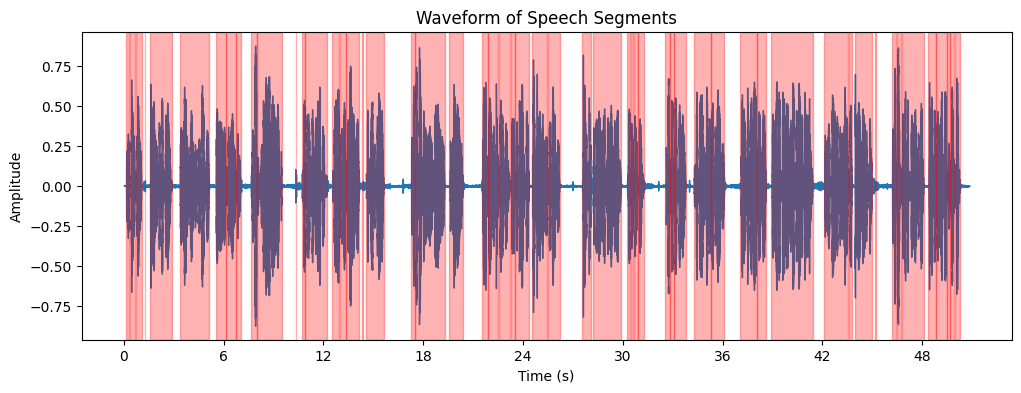

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Path to the audio file
audio_path = '/content/drive/MyDrive/CIHR/French-data/haiti1.mp3'

# Load the audio file using librosa
y, sr = librosa.load(audio_path)

# Set the silence threshold (200 ms)
silence_threshold = 0.01  # Adjust this value based on your audio characteristics

# Calculate short-term energy of the audio signal
frame_length = int(0.050 * sr)  # 50ms frames
hop_length = int(0.025 * sr)     # 25ms hop size
energy = librosa.feature.rms(y=y, frame_length=frame_length, hop_length=hop_length)

# Identify speech regions based on energy threshold
speech_segments = []
in_speech = False
for i, e in enumerate(energy[0]):
    if e > silence_threshold:
        if not in_speech:
            speech_start = i * hop_length
            in_speech = True
    else:
        if in_speech:
            speech_end = i * hop_length
            in_speech = False
            speech_segments.append((speech_start, speech_end))

# Display the waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)

# Overlay rectangles to indicate speech segments
for start, end in speech_segments:
    plt.axvspan(start / sr, end / sr, color='r', alpha=0.3)

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform of Speech Segments')
plt.show()


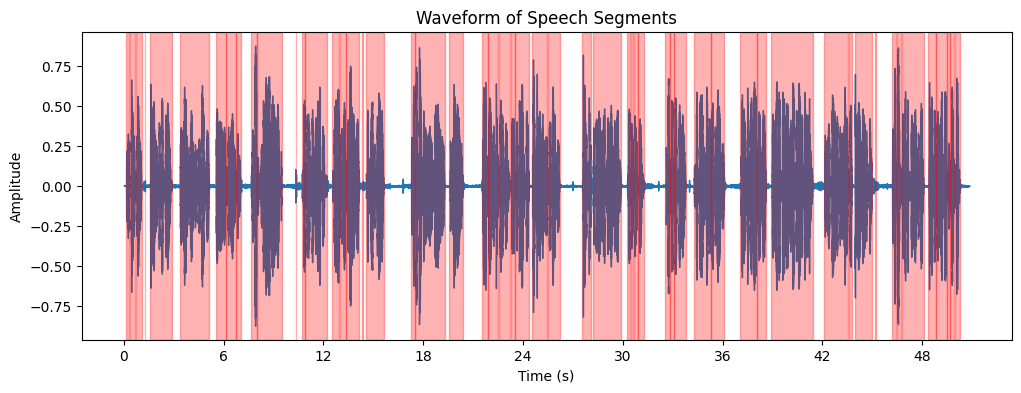

Total speech duration: 35.30897959183674 seconds


In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Path to the audio file
audio_path = '/content/drive/MyDrive/CIHR/French-data/haiti1.mp3'

# Load the audio file using librosa
y, sr = librosa.load(audio_path)

# Set the silence threshold (200 ms)
silence_threshold = 0.01  # Adjust this value based on your audio characteristics

# Calculate short-term energy of the audio signal
frame_length = int(0.050 * sr)  # 50ms frames
hop_length = int(0.025 * sr)     # 25ms hop size
energy = librosa.feature.rms(y=y, frame_length=frame_length, hop_length=hop_length)

# Identify speech regions based on energy threshold
speech_segments = []
in_speech = False
for i, e in enumerate(energy[0]):
    if e > silence_threshold:
        if not in_speech:
            speech_start = i * hop_length
            in_speech = True
    else:
        if in_speech:
            speech_end = i * hop_length
            in_speech = False
            speech_segments.append((speech_start, speech_end))

# Calculate total duration of speech segments
total_speech_duration = sum((end - start) / sr for start, end in speech_segments)

# Display the waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)

# Overlay rectangles to indicate speech segments
for start, end in speech_segments:
    plt.axvspan(start / sr, end / sr, color='r', alpha=0.3)

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform of Speech Segments')
plt.show()

# Print total speech duration
print("Total speech duration:", total_speech_duration, "seconds")


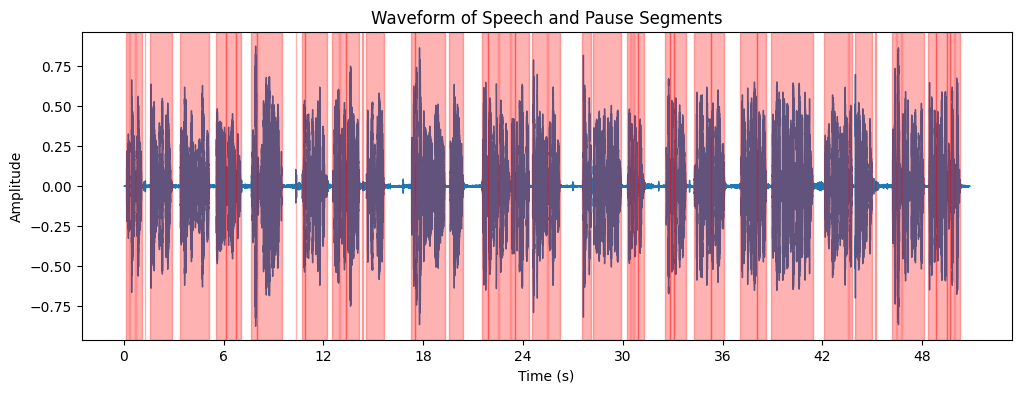

Total speech duration: 35.30897959183674 seconds
Total pause duration: 50.75197278911564 seconds


In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Path to the audio file
audio_path = '/content/drive/MyDrive/CIHR/French-data/haiti1.mp3'

# Load the audio file using librosa
y, sr = librosa.load(audio_path)

# Set the silence threshold (200 ms)
silence_threshold = 0.01  # Adjust this value based on your audio characteristics

# Calculate short-term energy of the audio signal
frame_length = int(0.050 * sr)  # 50ms frames
hop_length = int(0.025 * sr)     # 25ms hop size
energy = librosa.feature.rms(y=y, frame_length=frame_length, hop_length=hop_length)

# Identify speech and pause regions based on energy threshold
speech_segments = []
pause_segments = []
in_speech = False
for i, e in enumerate(energy[0]):
    if e > silence_threshold:
        if not in_speech:
            speech_start = i * hop_length
            in_speech = True
            if pause_segments and speech_start - pause_segments[-1][1] > 0:
                pause_segments.append((pause_segments[-1][1], speech_start))
        if i == len(energy[0]) - 1:
            speech_end = (i + 1) * hop_length
            speech_segments.append((speech_start, speech_end))
    else:
        if in_speech:
            speech_end = i * hop_length
            in_speech = False
            speech_segments.append((speech_start, speech_end))
        if pause_segments and i == len(energy[0]) - 1:
            pause_end = (i + 1) * hop_length
            pause_segments[-1] = (pause_segments[-1][0], pause_end)
        elif not speech_segments:
            pause_start = i * hop_length
            pause_segments.append((pause_start, pause_start))

# Calculate total duration of speech and pause segments
total_speech_duration = sum((end - start) / sr for start, end in speech_segments)
total_pause_duration = sum((end - start) / sr for start, end in pause_segments)

# Display the waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)

# Overlay rectangles to indicate speech segments
for start, end in speech_segments:
    plt.axvspan(start / sr, end / sr, color='r', alpha=0.3)

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform of Speech and Pause Segments')
plt.show()

# Print total speech and pause durations
print("Total speech duration:", total_speech_duration, "seconds")
print("Total pause duration:", total_pause_duration, "seconds")


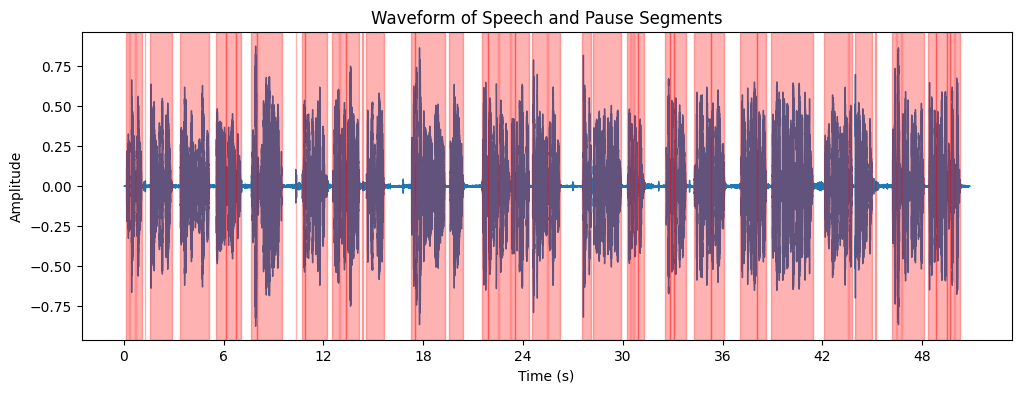

Total speech duration: 35.30897959183674 seconds
Total pause duration: 0.5747392290249433 seconds


In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Path to the audio file
audio_path = '/content/drive/MyDrive/CIHR/French-data/haiti1.mp3'

# Load the audio file using librosa
y, sr = librosa.load(audio_path)

# Set the silence threshold (200 ms)
silence_threshold = 0.01  # Adjust this value based on your audio characteristics

# Calculate short-term energy of the audio signal
frame_length = int(0.050 * sr)  # 50ms frames
hop_length = int(0.025 * sr)     # 25ms hop size
energy = librosa.feature.rms(y=y, frame_length=frame_length, hop_length=hop_length)

# Identify speech regions based on energy threshold
speech_segments = []
pause_segments = []
in_speech = False
for i, e in enumerate(energy[0]):
    if e > silence_threshold:
        if not in_speech:
            speech_start = i * hop_length
            in_speech = True
            if pause_segments and speech_start - pause_segments[-1][1] > 0:
                pause_segments[-1] = (pause_segments[-1][0], speech_start)
        if i == len(energy[0]) - 1:
            speech_end = (i + 1) * hop_length
            speech_segments.append((speech_start, speech_end))
    else:
        if in_speech:
            speech_end = i * hop_length
            in_speech = False
            speech_segments.append((speech_start, speech_end))
        if speech_segments and i == len(energy[0]) - 1:
            pause_start = speech_end
            pause_end = (i + 1) * hop_length
            pause_segments.append((pause_start, pause_end))

# Calculate total duration of speech and pause segments
total_speech_duration = sum((end - start) / sr for start, end in speech_segments)
total_pause_duration = sum((end - start) / sr for start, end in pause_segments)

# Display the waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)

# Overlay rectangles to indicate speech segments
for start, end in speech_segments:
    plt.axvspan(start / sr, end / sr, color='r', alpha=0.3)

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform of Speech and Pause Segments')
plt.show()

# Print total speech and pause durations
print("Total speech duration:", total_speech_duration, "seconds")
print("Total pause duration:", total_pause_duration, "seconds")


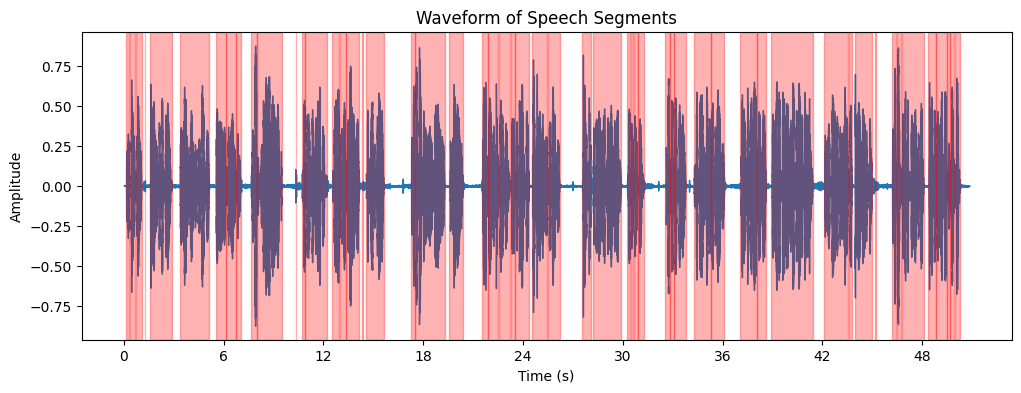

Total speech duration: 35.30897959183674 seconds
Total pause duration: 15.525306122448974 seconds


In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Path to the audio file
audio_path = '/content/drive/MyDrive/CIHR/French-data/haiti1.mp3'

# Load the audio file using librosa
y, sr = librosa.load(audio_path)

# Set the silence threshold (200 ms)
silence_threshold = 0.01  # Adjust this value based on your audio characteristics

# Calculate short-term energy of the audio signal
frame_length = int(0.050 * sr)  # 50ms frames
hop_length = int(0.025 * sr)     # 25ms hop size
energy = librosa.feature.rms(y=y, frame_length=frame_length, hop_length=hop_length)

# Identify speech regions based on energy threshold
speech_segments = []
in_speech = False
for i, e in enumerate(energy[0]):
    if e > silence_threshold:
        if not in_speech:
            speech_start = i * hop_length
            in_speech = True
    else:
        if in_speech:
            speech_end = i * hop_length
            in_speech = False
            speech_segments.append((speech_start, speech_end))

# Calculate total duration of speech segments
total_speech_duration = sum((end - start) / sr for start, end in speech_segments)

# Calculate total duration of audio
total_audio_duration = len(y) / sr

# Calculate total pause duration
total_pause_duration = total_audio_duration - total_speech_duration

# Display the waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)

# Overlay rectangles to indicate speech segments
for start, end in speech_segments:
    plt.axvspan(start / sr, end / sr, color='r', alpha=0.3)

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform of Speech Segments')
plt.show()

# Print total speech and pause durations
print("Total speech duration:", total_speech_duration, "seconds")
print("Total pause duration:", total_pause_duration, "seconds")


In [ ]:
import librosa

def calculate_total_duration(audio_file_path):
    # Load the audio file and extract the audio signal and sampling rate
    audio_signal, sampling_rate = librosa.load(audio_file_path)
    # Calculate the total duration (in seconds)
    total_duration = len(audio_signal) / sampling_rate

    return total_duration

# Replace "path/to/your/audio/file.wav" with the actual path to your audio file in your Google Drive or elsewhere.

total_duration = calculate_total_duration(audio_path)
print(f"Total duration: {total_duration:.2f} seconds")


Total duration: 50.83 seconds


In [ ]:
import librosa

def calculate_speaking_rate(audio_file_path):
    # Load the audio file and extract the audio signal and sampling rate
    audio_signal, sampling_rate = librosa.load(audio_file_path)

    # Calculate short-term energy of the audio signal
    frame_length = int(0.050 * sampling_rate)  # 50ms frames
    hop_length = int(0.025 * sampling_rate)    # 25ms hop size
    energy = librosa.feature.rms(y=audio_signal, frame_length=frame_length, hop_length=hop_length)

    # Calculate the speaking rate based on energy thresholding
    energy_threshold = 0.01  # Adjust this value based on your audio characteristics
    speaking_rate = sum(1 for e in energy[0] if e > energy_threshold)

    return speaking_rate

# Replace "path/to/your/audio/file.wav" with the actual path to your audio file in your Google Drive or elsewhere.
audio_path = "/content/drive/MyDrive/CIHR/French-data/haiti1.mp3"
speaking_rate = calculate_speaking_rate(audio_path)
print(f"Estimated speaking rate: {speaking_rate} words per minute.")


Estimated speaking rate: 1413 words per minute.


In [ ]:

def calculate_pause_rate(audio_file_path):
    # Load the audio file and extract the audio signal and sampling rate
    audio_signal, sampling_rate = librosa.load(audio_file_path)

    # Calculate short-term energy of the audio signal
    frame_length = int(0.050 * sampling_rate)  # 50ms frames
    hop_length = int(0.025 * sampling_rate)    # 25ms hop size
    energy = librosa.feature.rms(y=audio_signal, frame_length=frame_length, hop_length=hop_length)

    # Calculate the pause rate based on energy thresholding
    energy_threshold = 0.01  # Adjust this value based on your audio characteristics
    is_pause = [e <= energy_threshold for e in energy[0]]

    # Count the number of pauses
    pause_rate = sum(1 for i in range(1, len(is_pause)) if is_pause[i] and not is_pause[i - 1])

    return pause_rate

# Replace "path/to/your/audio/file.wav" with the actual path to your audio file in your Google Drive or elsewhere.

pause_rate = calculate_pause_rate(audio_path)
print(f"Number of pauses: {pause_rate}")


Number of pauses: 55


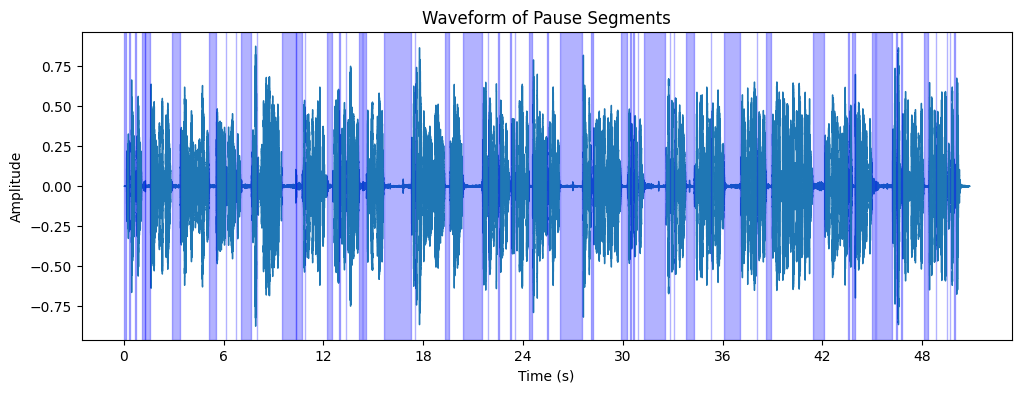

Total pause duration: 14.96820861678005 seconds
Number of pauses: 55


In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Path to the audio file
audio_path = '/content/drive/MyDrive/CIHR/French-data/haiti1.mp3'

# Load the audio file using librosa
y, sr = librosa.load(audio_path)

# Set the silence threshold (200 ms)
silence_threshold = 0.01  # Adjust this value based on your audio characteristics

# Calculate short-term energy of the audio signal
frame_length = int(0.050 * sr)  # 50ms frames
hop_length = int(0.025 * sr)     # 25ms hop size
energy = librosa.feature.rms(y=y, frame_length=frame_length, hop_length=hop_length)

# Identify pause regions based on energy threshold
pause_segments = []
in_pause = False
for i, e in enumerate(energy[0]):
    if e <= silence_threshold:
        if not in_pause:
            pause_start = i * hop_length
            in_pause = True
    else:
        if in_pause:
            pause_end = i * hop_length
            in_pause = False
            pause_segments.append((pause_start, pause_end))

# Calculate total pause duration
total_pause_duration = sum((end - start) / sr for start, end in pause_segments)

# Display the waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)

# Overlay rectangles to indicate pause segments
for start, end in pause_segments:
    plt.axvspan(start / sr, end / sr, color='b', alpha=0.3)

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform of Pause Segments')
plt.show()

# Print total pause duration
print("Total pause duration:", total_pause_duration, "seconds")

# Print number of pauses
num_pauses = len(pause_segments)
print("Number of pauses:", num_pauses)


In [ ]:


def calculate_speech_rate(audio_file_path):
    # Load the audio file and extract the audio signal and sampling rate
    audio_signal, sampling_rate = librosa.load(audio_file_path)

    # Calculate short-term energy of the audio signal
    frame_length = int(0.050 * sampling_rate)  # 50ms frames
    hop_length = int(0.025 * sampling_rate)    # 25ms hop size
    energy = librosa.feature.rms(y=audio_signal, frame_length=frame_length, hop_length=hop_length)

    # Calculate the speech rate based on energy thresholding
    energy_threshold = 0.01  # Adjust this value based on your audio characteristics
    is_speech = [e > energy_threshold for e in energy[0]]

    # Calculate speech duration (in seconds)
    speech_duration = sum(hop_length for i in range(1, len(is_speech)) if is_speech[i] and not is_speech[i - 1]) / sampling_rate

    # Calculate speech rate (words per minute)
    words_per_minute = 150  # Adjust this value based on the average speaking rate of your audio
    speech_rate = words_per_minute * speech_duration / 60

    return speech_rate
# Replace "path/to/your/audio/file.wav" with the actual path to your audio file in your Google Drive or elsewhere.
speech_rate = calculate_speech_rate(audio_path)
print(f"Speech rate: {speech_rate:.2f} words per minute")


Speech rate: 3.44 words per minute


Speaking rate changes

In [ ]:


def calculate_speech_rate(audio_path, segment_duration=10):
    # Load the audio file and extract the audio signal and sampling rate
    audio_signal, sampling_rate = librosa.load(audio_path)

    # Calculate the total duration of the audio (in seconds)
    total_duration = len(audio_signal) / sampling_rate

    # Calculate the number of segments
    num_segments = int(total_duration / segment_duration)

    # Initialize a list to store the speech rates for each segment
    speech_rates = []

    for i in range(num_segments):
        # Calculate the start and end index for the current segment
        start_index = i * segment_duration * sampling_rate
        end_index = (i + 1) * segment_duration * sampling_rate

        # Extract the audio segment
        segment = audio_signal[start_index:end_index]

        # Calculate short-term energy of the audio segment
        frame_length = int(0.050 * sampling_rate)  # 50ms frames
        hop_length = int(0.025 * sampling_rate)    # 25ms hop size
        energy = librosa.feature.rms(y=segment, frame_length=frame_length, hop_length=hop_length)

        # Calculate the speech rate based on energy thresholding
        energy_threshold = 0.01  # Adjust this value based on your audio characteristics
        is_speech = [e > energy_threshold for e in energy[0]]

        # Calculate speech duration (in seconds) for the current segment
        speech_duration = sum(hop_length for j in range(1, len(is_speech)) if is_speech[j] and not is_speech[j - 1]) / sampling_rate

        # Calculate speech rate (words per minute) for the current segment
        words_per_minute = 150  # Adjust this value based on the average speaking rate of your audio
        speech_rate = words_per_minute * speech_duration / 60

        speech_rates.append(speech_rate)

    return speech_rates

# Replace "path/to/your/audio/file.wav" with the actual path to your audio file in your Google Drive or elsewhere.

segment_duration = 10  # Specify the duration of each segment in seconds
speech_rates = calculate_speech_rate(audio_path, segment_duration)

# Print the speech rates for each segment
for i, rate in enumerate(speech_rates):
    print(f"Segment {i + 1}: {rate:.2f} words per minute")


Segment 1: 0.69 words per minute
Segment 2: 0.62 words per minute
Segment 3: 0.56 words per minute
Segment 4: 0.69 words per minute
Segment 5: 0.81 words per minute


Vocal Fatigue

In [ ]:
!pip install pyworld

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.0/252.0 kB 4.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyworld: filename=pyworld-0.3.4-cp310-cp310-linux_x86_64.whl size=863316 sha256=7edcdd63b9d70c9c4d4d17e7d13ed5d4ac0c6cb67c4a86f85999d166b3308387
  Stored in directory: /root/.cache/pip/wheels/66/09/8a/a1d79b73d59756f66e9bfe55a199840efc7473adb76ddacdfd
Successfully built pyworld


In [ ]:
import numpy as np
import librosa
import pyworld as pw
import matplotlib.pyplot as plt

def analyze_f0(audio_path):
    # Load the audio file and extract the audio signal and sampling rate
    audio_signal, sampling_rate = librosa.load(audio_path)

    # Extract the fundamental frequency (F0) using the WORLD vocoder
    f0, timeaxis = pw.harvest(audio_signal, sampling_rate)

    return f0, timeaxis

# Replace "path/to/your/audio/file.wav" with the actual path to your audio file in your Google Drive or elsewhere.
f0, timeaxis = analyze_f0(audio_path)

# Plot the Fundamental Frequency (F0) over time
plt.figure(figsize=(10, 5))
plt.plot(timeaxis, f0, linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Fundamental Frequency (Hz)")
plt.title("Fundamental Frequency (F0) Analysis")
plt.grid()
plt.show()


ValueError: ignored

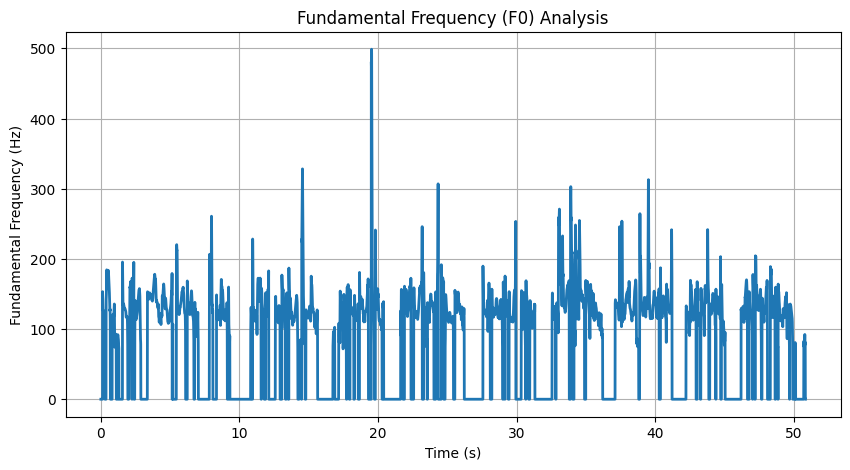

In [ ]:
import numpy as np
import librosa
import pyworld as pw
import matplotlib.pyplot as plt

def analyze_f0(audio_path):
    # Load the audio file and extract the audio signal and sampling rate
    audio_signal, sampling_rate = librosa.load(audio_path)

    # Convert audio signal data type to 'double'
    audio_signal = audio_signal.astype(np.float64)

    # Extract the fundamental frequency (F0) using the WORLD vocoder
    f0, timeaxis = pw.harvest(audio_signal, sampling_rate)

    return f0, timeaxis

# Replace "path/to/your/audio/file.wav" with the actual path to your audio file in your Google Drive or elsewhere.

f0, timeaxis = analyze_f0(audio_path)

# Plot the Fundamental Frequency (F0) over time
plt.figure(figsize=(10, 5))
plt.plot(timeaxis, f0, linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Fundamental Frequency (Hz)")
plt.title("Fundamental Frequency (F0) Analysis")
plt.grid()
plt.show()


Pitch rate changes

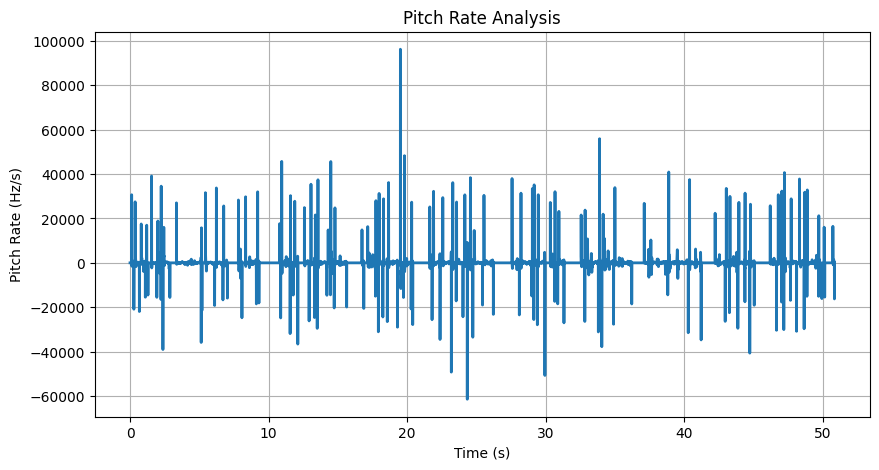

In [ ]:
import numpy as np
import librosa
import pyworld as pw
import matplotlib.pyplot as plt

def calculate_pitch_rate(audio_path):
    # Load the audio file and extract the audio signal and sampling rate
    audio_signal, sampling_rate = librosa.load(audio_path)

    # Convert audio signal data type to 'double'
    audio_signal = audio_signal.astype(np.float64)

    # Extract the fundamental frequency (F0) using the WORLD vocoder
    f0, timeaxis = pw.harvest(audio_signal, sampling_rate)

    # Calculate the rate of change of F0 (pitch rate)
    pitch_rate = np.diff(f0) / np.diff(timeaxis)

    return timeaxis[:-1], pitch_rate

# Replace "path/to/your/audio/file.wav" with the actual path to your audio file in your Google Drive or elsewhere.

timeaxis, pitch_rate = calculate_pitch_rate(audio_path)

# Plot the pitch rate over time
plt.figure(figsize=(10, 5))
plt.plot(timeaxis, pitch_rate, linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Pitch Rate (Hz/s)")
plt.title("Pitch Rate Analysis")
plt.grid()
plt.show()


Shimmer and jitter


In [ ]:
import numpy as np
import librosa
import pyworld as pw
import matplotlib.pyplot as plt

def calculate_shimmer_jitter(audio_path):
    # Load the audio file and extract the audio signal and sampling rate
    audio_signal, sampling_rate = librosa.load(audio_path)

    # Convert audio signal data type to 'double'
    audio_signal = audio_signal.astype(np.float64)

    # Extract the fundamental frequency (F0) using the WORLD vocoder
    f0, timeaxis = pw.harvest(audio_signal, sampling_rate)

    # Calculate the shimmer and jitter
    shimmer = pw.shimmer(audio_signal, f0, timeaxis, sampling_rate)
    jitter = pw.jitter(f0)

    return shimmer, jitter

# Replace "path/to/your/audio/file.wav" with the actual path to your audio file in your Google Drive or elsewhere.
shimmer, jitter = calculate_shimmer_jitter(audio_path)

print(f"Shimmer: {shimmer:.4f}")
print(f"Jitter: {jitter:.4f}")


AttributeError: ignored

In [ ]:
import numpy as np
import librosa
import pyworld as pw
import matplotlib.pyplot as plt

def calculate_shimmer(audio_path):
    # Load the audio file and extract the audio signal and sampling rate
    audio_signal, sampling_rate = librosa.load(audio_path)

    # Convert audio signal data type to 'double'
    audio_signal = audio_signal.astype(np.float64)

    # Extract the fundamental frequency (F0) using the WORLD vocoder
    f0, timeaxis = pw.harvest(audio_signal, sampling_rate)

    # Calculate the shimmer (cycle-to-cycle variation in amplitude)
    shimmer = pw.extract_shimmer(audio_signal, f0, timeaxis, sampling_rate)

    return timeaxis, shimmer

def calculate_shimmer_changes(timeaxis, shimmer):
    # Calculate the rate of change of shimmer (shimmer changes)
    shimmer_changes = np.diff(shimmer) / np.diff(timeaxis)

    # Pad the shimmer_changes array to have the same length as timeaxis
    shimmer_changes = np.concatenate(([0], shimmer_changes))

    return shimmer_changes

# Replace "path/to/your/audio/file.wav" with the actual path to your audio file in your Google Drive or elsewhere.
timeaxis, shimmer = calculate_shimmer(audio_path)
shimmer_changes = calculate_shimmer_changes(timeaxis, shimmer)

# Plot the shimmer values and shimmer changes over time
plt.figure(figsize=(10, 5))
plt.plot(timeaxis, shimmer, label='Shimmer', linewidth=2)
plt.plot(timeaxis, shimmer_changes, label='Shimmer Changes', linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Shimmer / Shimmer Changes")
plt.title("Shimmer and Shimmer Changes Analysis")
plt.legend()
plt.grid()
plt.show()


AttributeError: ignored

In [ ]:
import numpy as np
import librosa
import pyworld as pw
import matplotlib.pyplot as plt

def calculate_shimmer(audio_path):
    # Load the audio file and extract the audio signal and sampling rate
    audio_signal, sampling_rate = librosa.load(audio_path)

    # Convert audio signal data type to 'double'
    audio_signal = audio_signal.astype(np.float64)

    # Extract the fundamental frequency (F0) using the WORLD vocoder
    f0, timeaxis = pw.harvest(audio_signal, sampling_rate)

    # Calculate the shimmer (cycle-to-cycle variation in amplitude)
    shimmer = calculate_amplitude_variation(audio_signal, f0)

    return timeaxis, shimmer

def calculate_amplitude_variation(audio_signal, f0):
    # Get the glottal cycle indices based on the fundamental frequency (F0)
    cycle_indices = pw.stonemask(audio_signal, f0, np.arange(len(audio_signal)))

    # Calculate shimmer (cycle-to-cycle variation in amplitude)
    shimmer = np.abs(np.diff(audio_signal[cycle_indices]))

    return shimmer

def calculate_shimmer_changes(timeaxis, shimmer):
    # Calculate the rate of change of shimmer (shimmer changes)
    shimmer_changes = np.diff(shimmer) / np.diff(timeaxis)

    # Pad the shimmer_changes array to have the same length as timeaxis
    shimmer_changes = np.concatenate(([0], shimmer_changes))

    return shimmer_changes

# Replace "path/to/your/audio/file.wav" with the actual path to your audio file in your Google Drive or elsewhere.
timeaxis, shimmer = calculate_shimmer(audio_path)
shimmer_changes = calculate_shimmer_changes(timeaxis, shimmer)

# Plot the shimmer values and shimmer changes over time
plt.figure(figsize=(10, 5))
plt.plot(timeaxis, shimmer, label='Shimmer', linewidth=2)
plt.plot(timeaxis, shimmer_changes, label='Shimmer Changes', linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Shimmer / Shimmer Changes")
plt.title("Shimmer and Shimmer Changes Analysis")
plt.legend()
plt.grid()
plt.show()


TypeError: ignored

In [ ]:
import numpy as np
import librosa
import pyworld as pw
import matplotlib.pyplot as plt

def calculate_shimmer(audio_path):
    # Load the audio file and extract the audio signal and sampling rate
    audio_signal, sampling_rate = librosa.load(audio_path)

    # Convert audio signal data type to 'double'
    audio_signal = audio_signal.astype(np.float64)

    # Extract the fundamental frequency (F0) using the WORLD vocoder
    f0, timeaxis = pw.harvest(audio_signal, sampling_rate)

    # Calculate the shimmer (cycle-to-cycle variation in amplitude)
    shimmer = calculate_amplitude_variation(audio_signal, f0)

    return timeaxis, shimmer

def calculate_amplitude_variation(audio_signal, f0):
    # Get the glottal cycle indices based on the fundamental frequency (F0)
    cycle_indices = pw.stonemask(audio_signal, f0, sampling_rate)

    # Calculate shimmer (cycle-to-cycle variation in amplitude)
    shimmer = np.abs(np.diff(audio_signal[cycle_indices]))

    return shimmer

def calculate_shimmer_changes(timeaxis, shimmer):
    # Calculate the rate of change of shimmer (shimmer changes)
    shimmer_changes = np.diff(shimmer) / np.diff(timeaxis)

    # Pad the shimmer_changes array to have the same length as timeaxis
    shimmer_changes = np.concatenate(([0], shimmer_changes))

    return shimmer_changes

# Replace "path/to/your/audio/file.wav" with the actual path to your audio file in your Google Drive or elsewhere.
timeaxis, shimmer = calculate_shimmer(audio_path)
shimmer_changes = calculate_shimmer_changes(timeaxis, shimmer)

# Plot the shimmer values and shimmer changes over time
plt.figure(figsize=(10, 5))
plt.plot(timeaxis, shimmer, label='Shimmer', linewidth=2)
plt.plot(timeaxis, shimmer_changes, label='Shimmer Changes', linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Shimmer / Shimmer Changes")
plt.title("Shimmer and Shimmer Changes Analysis")
plt.legend()
plt.grid()
plt.show()


NameError: ignored

In [ ]:
import numpy as np
import librosa
import pyworld as pw
import matplotlib.pyplot as plt

def calculate_shimmer(audio_path):
    # Load the audio file and extract the audio signal and sampling rate
    audio_signal, sampling_rate = librosa.load(audio_path)

    # Convert audio signal data type to 'double'
    audio_signal = audio_signal.astype(np.float64)

    # Extract the fundamental frequency (F0) using the WORLD vocoder
    f0, timeaxis = pw.harvest(audio_signal, sampling_rate)

    # Calculate the shimmer (cycle-to-cycle variation in amplitude)
    shimmer = calculate_amplitude_variation(audio_signal, f0, sampling_rate)

    return timeaxis, shimmer

def calculate_amplitude_variation(audio_signal, f0, sampling_rate):
    # Get the glottal cycle indices based on the fundamental frequency (F0)
    cycle_indices = pw.stonemask(audio_signal, f0, sampling_rate)

    # Calculate shimmer (cycle-to-cycle variation in amplitude)
    shimmer = np.abs(np.diff(audio_signal[cycle_indices]))

    return shimmer

def calculate_shimmer_changes(timeaxis, shimmer):
    # Calculate the rate of change of shimmer (shimmer changes)
    shimmer_changes = np.diff(shimmer) / np.diff(timeaxis)

    # Pad the shimmer_changes array to have the same length as timeaxis
    shimmer_changes = np.concatenate(([0], shimmer_changes))

    return shimmer_changes

# Replace "path/to/your/audio/file.wav" with the actual path to your audio file in your Google Drive or elsewhere.
timeaxis, shimmer = calculate_shimmer(audio_path)
shimmer_changes = calculate_shimmer_changes(timeaxis, shimmer)

# Plot the shimmer values and shimmer changes over time
plt.figure(figsize=(10, 5))
plt.plot(timeaxis, shimmer, label='Shimmer', linewidth=2)
plt.plot(timeaxis, shimmer_changes, label='Shimmer Changes', linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Shimmer / Shimmer Changes")
plt.title("Shimmer and Shimmer Changes Analysis")
plt.legend()
plt.grid()
plt.show()


TypeError: ignored

In [ ]:
!pip install pyttsx3


In [ ]:
import pyttsx3

def set_voice_parameters(engine, rate, volume):
    # Set the speech rate (speed). 1.0 is the normal speech rate.
    engine.setProperty('rate', rate)

    # Set the speech volume. Volume ranges from 0 to 1.0.
    engine.setProperty('volume', volume)

def slurred_speech(text, rate=80, volume=0.6):
    # Initialize the TTS engine
    engine = pyttsx3.init()
    # Set custom voice parameters for slurred speech
    set_voice_parameters(engine, rate, volume)

    # Convert the text to speech
    engine.say(text)

    # Wait for the speech to complete
    engine.runAndWait()

# Text to be spoken with slurred speech effect
text = "Hello, how are you doing today?"

# Call the function to produce slurred speech
slurred_speech(text)


OSError: ignored

In [ ]:
!sudo apt-get install espeak


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  espeak-data libespeak1 libportaudio2 libsonic0
The following NEW packages will be installed:
  espeak espeak-data libespeak1 libportaudio2 libsonic0
0 upgraded, 5 newly installed, 0 to remove and 15 not upgraded.
Need to get 1,382 kB of archives.
After this operation, 3,178 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudio2 amd64 19.6.0-1.1 [65.3 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libsonic0 amd64 0.2.0-11build1 [10.3 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 espeak-data amd64 1.48.15+dfsg-3 [1,085 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libespeak1 amd64 1.48.15+dfsg-3 [156 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy/universe amd64 espeak amd64 1.48.15+dfsg-3 [64.2 kB]
Fetched 1,382 kB in 1s (1,615 

In [ ]:
import pyttsx3

def set_voice_parameters(engine, rate, volume):
    # Set the speech rate (speed). 1.0 is the normal speech rate.
    engine.setProperty('rate', rate)

    # Set the speech volume. Volume ranges from 0 to 1.0.
    engine.setProperty('volume', volume)

def slurred_speech(text, rate=80, volume=0.6):
    # Initialize the TTS engine
    engine = pyttsx3.init()
    # Set custom voice parameters for slurred speech
    set_voice_parameters(engine, rate, volume)

    # Convert the text to speech
    engine.say(text)

    # Wait for the speech to complete
    engine.runAndWait()

# Text to be spoken with slurred speech effect
text = "Hello, how are you doing today?"

# Call the function to produce slurred speech
slurred_speech(text)
print (slurred_speech(text))


None


Measure Articulation Changes in speech using speechpy python

In [ ]:
!pip install speechpy


[[-1.82404738e+01  3.90929770e-02  2.11468480e+00 ...  1.63717666e+00
   1.70429895e+00  8.14139600e-01]
 [-1.55438588e+01 -1.18529333e-01  1.24182994e+00 ... -1.43619220e+00
  -4.31407028e-03  7.43746167e-02]
 [-1.09011905e+01  2.58621047e+00  3.07013962e+00 ...  9.66525768e-01
   4.82380819e-01  1.35836832e+00]
 ...
 [-9.84715540e+00  1.48907218e+00  2.06440224e-01 ... -7.12987596e-01
  -1.36681459e+00 -7.19363195e-01]
 [-1.01635604e+01  2.43378165e+00  2.79701771e-01 ...  1.14446804e+00
  -7.74837148e-01 -6.37954512e-01]
 [-1.05284834e+01  6.49923731e+00  2.61149442e+00 ...  3.31824242e-01
  -1.98025180e-01  4.02203798e-02]]


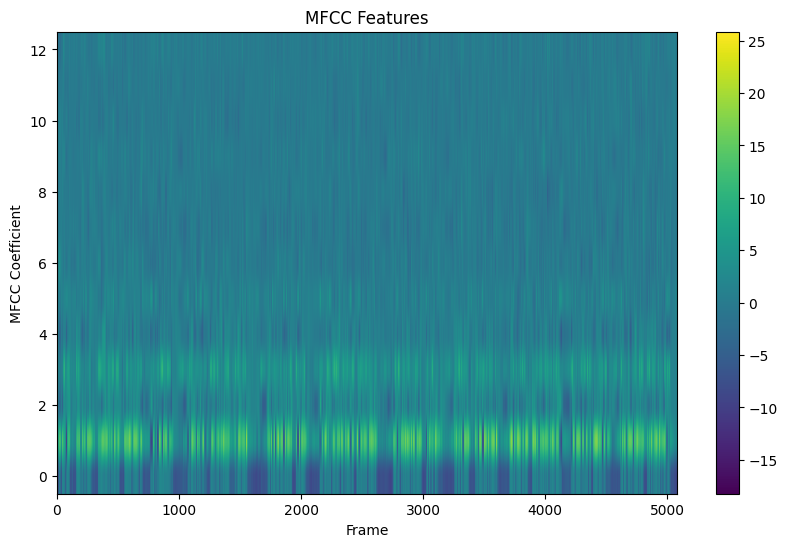

In [ ]:
import numpy as np
import librosa
import speechpy

# Load the speech audio (replace 'your_audio.wav' with your file's name)
audio_path = '/content/drive/MyDrive/CIHR/French-data/haiti1.mp3'
signal, sampling_rate = librosa.load(audio_path, sr=None)

# Preprocessing (optional)
# Apply any required preprocessing steps here, such as removing noise or normalizing the amplitude.

# Extract MFCC features
mfcc_features = speechpy.feature.mfcc(signal, sampling_rate)

# Display the MFCC features (optional)
print(mfcc_features)

# Visualize the MFCC features (optional)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.imshow(np.transpose(mfcc_features), cmap='viridis', origin='lower', aspect='auto')
plt.xlabel('Frame')
plt.ylabel('MFCC Coefficient')
plt.title('MFCC Features')
plt.colorbar()
plt.show()


In [ ]:
# Install required libraries
!apt-get -qq install -y libsndfile1

# Download and extract openSMILE
!wget https://www.audeering.com/download/1580/opensmile-3.1.0.tar.gz
!tar -xzf opensmile-3.1.0.tar.gz

# Install required Python libraries
!pip install pydub

# Convert MP3 to WAV (if necessary)
from pydub import AudioSegment

mp3_path = '/content/drive/MyDrive/CIHR/French-data/haiti1.mp3'
wav_path = '/content/drive/MyDrive/CIHR/French-data/haiti1.wav'

sound = AudioSegment.from_mp3(mp3_path)
sound.export(wav_path, format="wav")

# Extract openSMILE features
!SMILExtract -C opensmile-3.1.0/config/IS13_ComParE.conf -I "/content/drive/MyDrive/CIHR/French-data/haiti1.wav" -O /content/drive/MyDrive/CIHR/French-data/haiti1.csv


--2023-08-14 19:20:42--  https://www.audeering.com/download/1580/opensmile-3.1.0.tar.gz
Resolving www.audeering.com (www.audeering.com)... 162.55.57.57
Connecting to www.audeering.com (www.audeering.com)|162.55.57.57|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2023-08-14 19:20:45 ERROR 404: Not Found.

tar (child): opensmile-3.1.0.tar.gz: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now
/bin/bash: line 1: SMILExtract: command not found


In [ ]:
# Install required libraries
!apt-get -qq install -y libsndfile1

# Convert MP3 to WAV (if necessary)
from pydub import AudioSegment

mp3_path = '/content/drive/MyDrive/CIHR/French-data/haiti1.mp3'
wav_path = '/content/drive/MyDrive/CIHR/French-data/haiti1.wav'

sound = AudioSegment.from_mp3(mp3_path)
sound.export(wav_path, format="wav")

# Extract openSMILE features
!'/content/drive/MyDrive/path_to_opensmile/opensmile-3.1.0/bin/linux_x64_standalone/SMILExtract' -C '/content/drive/MyDrive/path_to_opensmile/opensmile-3.1.0/config/IS13_ComParE.conf' -I '/content/drive/MyDrive/CIHR/French-data/haiti1.wav' -O '/content/drive/MyDrive/CIHR/French-data/haiti1.csv'


/bin/bash: line 1: /content/drive/MyDrive/path_to_opensmile/opensmile-3.1.0/bin/linux_x64_standalone/SMILExtract: No such file or directory


In [ ]:
from google.colab import files
uploaded = files.upload()

MessageError: ignored

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Install required libraries
!apt-get -qq install -y libsndfile1

# Extract openSMILE
!tar -xzf '/content/drive/MyDrive/path_to_opensmile/opensmile-3.0-linux-x64.tar.gz'

# Convert MP3 to WAV (if necessary)
from pydub import AudioSegment

mp3_path = '/content/drive/MyDrive/CIHR/French-data/haiti1.mp3'
wav_path = '/content/drive/MyDrive/CIHR/French-data/haiti1.wav'

sound = AudioSegment.from_mp3(mp3_path)
sound.export(wav_path, format="wav")

# Extract openSMILE features
!'/content/opensmile-3.0-linux-x64/bin/linux_x64_standalone/SMILExtract' -C '/content/opensmile-3.0-linux-x64/config/IS13_ComParE.conf' -I '/content/drive/MyDrive/CIHR/French-data/haiti1.wav' -O '/content/drive/MyDrive/CIHR/French-data/haiti1.csv'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
tar (child): /content/drive/MyDrive/path_to_opensmile/opensmile-3.0-linux-x64.tar.gz: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now
/bin/bash: line 1: /content/opensmile-3.0-linux-x64/bin/linux_x64_standalone/SMILExtract: No such file or directory
